# Characteristics and skill sets required as put in the job postings

In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
%matplotlib inline


In [2]:
df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['RequiredQual'])
print(df.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(16689, 24)
Removed 2312 duplicates (based on RequiredQual)


In [8]:
df["RequiredQual"].head()

0    To perform this job successfully, an\r\nindivi...
1    - Bachelor's Degree; Master's is preferred;\r\...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [11]:
df["RequiredQual"] = df["RequiredQual"].astype(str)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['RequiredQual_token'] = df['RequiredQual'].map(word_tokenize)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.RequiredQual_token.head()

0    [To, perform, this, job, successfully, ,, an, ...
1    [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
2    [-, Degree, in, environmentally, related, fiel...
3    [-, Advanced, degree, in, public, health, ,, s...
4    [-, University, degree, ;, economical, backgro...
Name: RequiredQual_token, dtype: object

In [14]:
df.RequiredQual_token[0][:10]


['To',
 'perform',
 'this',
 'job',
 'successfully',
 ',',
 'an',
 'individual',
 'must',
 'be']

In [15]:
df['RequiredQual_len'] = df.RequiredQual_token.apply(len)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.RequiredQual_len.head()

0    455
1     61
2     47
3    112
4     63
Name: RequiredQual_len, dtype: int64

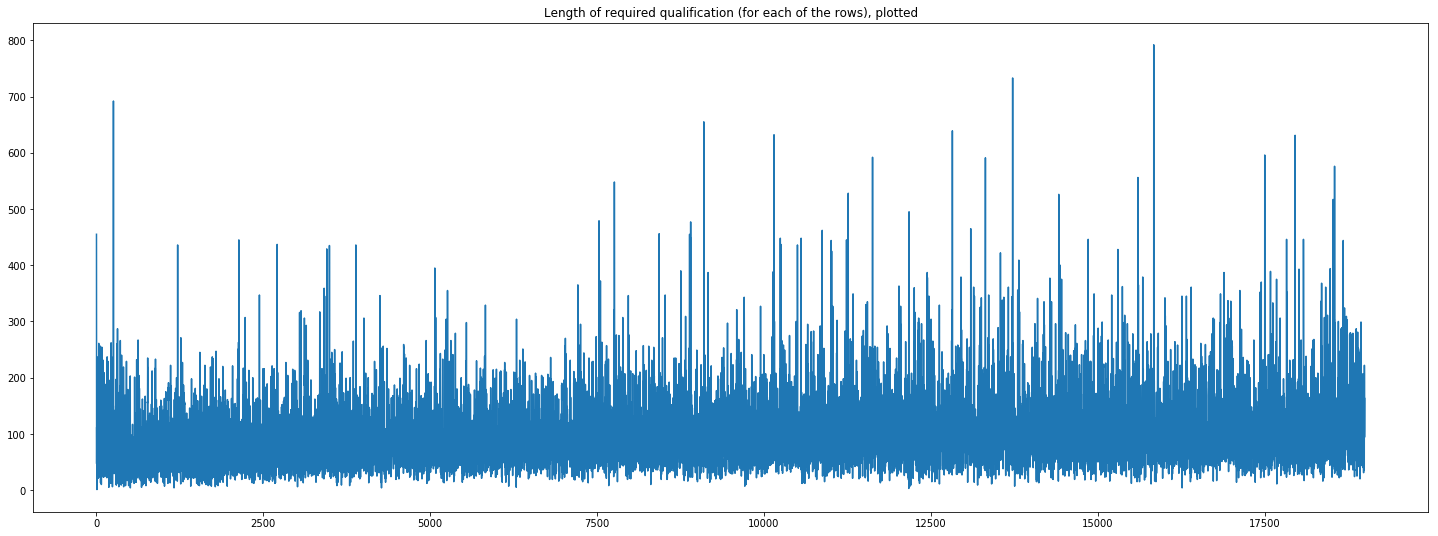

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 9))
plt.plot(df.RequiredQual_len)
plt.title('Length of required qualification (for each of the rows), plotted')
plt.show()

In [21]:
df['RequiredQual_token_uniq'] = df.RequiredQual_token.apply(set)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df['RequiredQual_token_uniq'].head()

0    {feedback, essential, rewarding, development, ...
1    {written, a, Commensurate, independently, in, ...
2    {written, commensurate, Russian, a, or, ,, in,...
3    {written, preferably, five, a, Familiarity, Ex...
4    {norms, IP, be, commensurate, a, development, ...
Name: RequiredQual_token_uniq, dtype: object

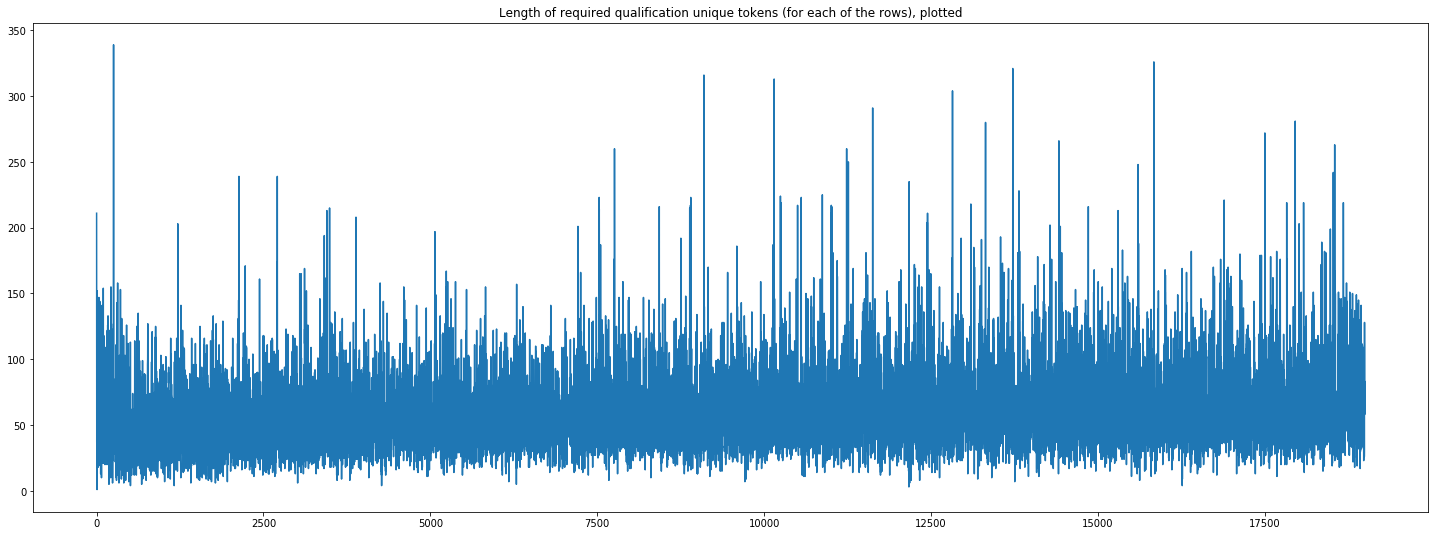

In [24]:
plt.figure(figsize=(25, 9))
plt.plot(df.RequiredQual_token_uniq.apply(len))
plt.title('Length of required qualification unique tokens (for each of the rows), plotted')
plt.show()

Text(0.5,1,'Avg. no. times each word is used (for each of the rows), plotted')

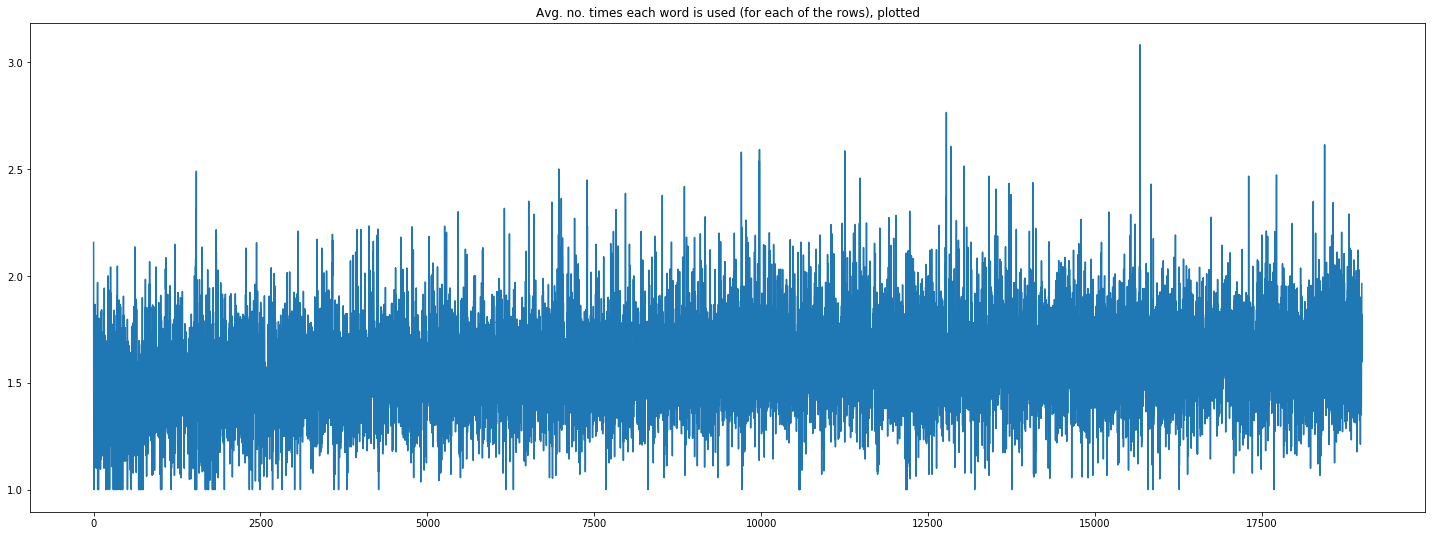

In [25]:
plt.figure(figsize=(25, 9))
plt.plot(df['RequiredQual_len']/df.RequiredQual_token_uniq.apply(len))
plt.title('Avg. no. times each word is used (for each of the rows), plotted')

So on average, each word is used 1.5 - 2.5 times in each job posting. 

## Try One Row First, if it works we can make it into a function and apply across the rows

In [33]:
tokens = (df.iloc[0])['RequiredQual_token']

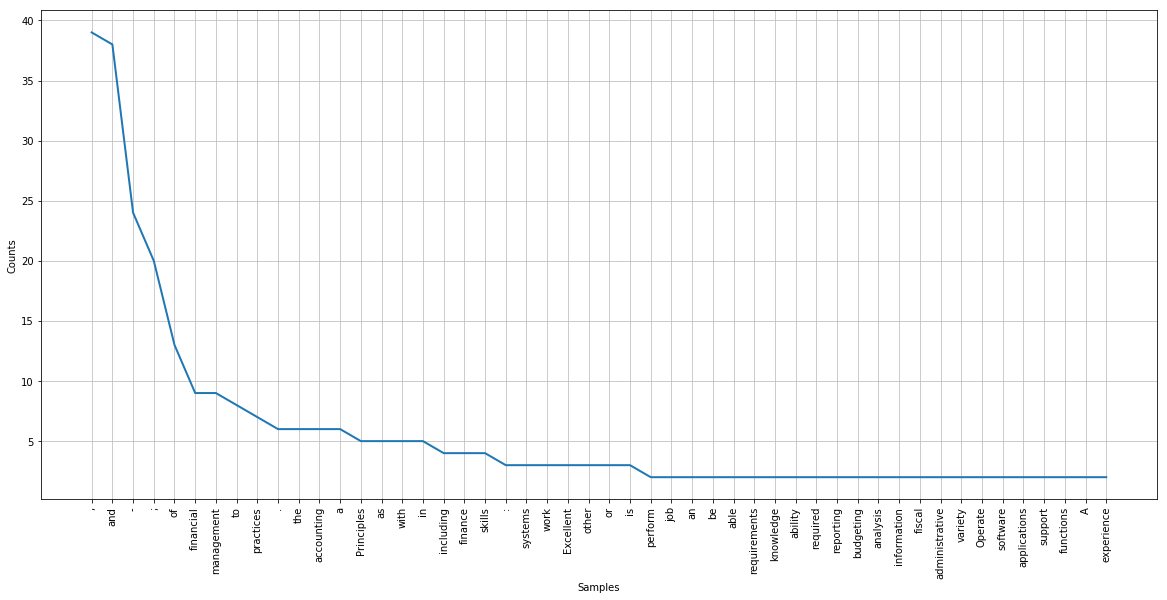

In [34]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

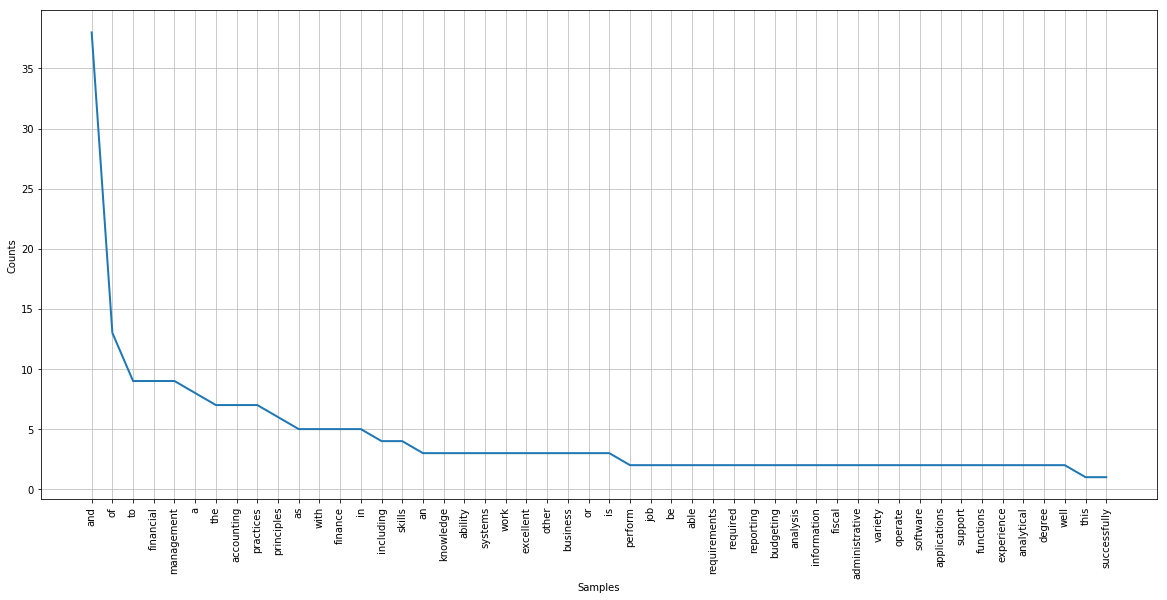

In [35]:
# Remove punctuations, convert all to lower-case, and try again
tokens_nop = [t for t in tokens if t not in string.punctuation]
tokens_nop = [t.lower() for t in tokens_nop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

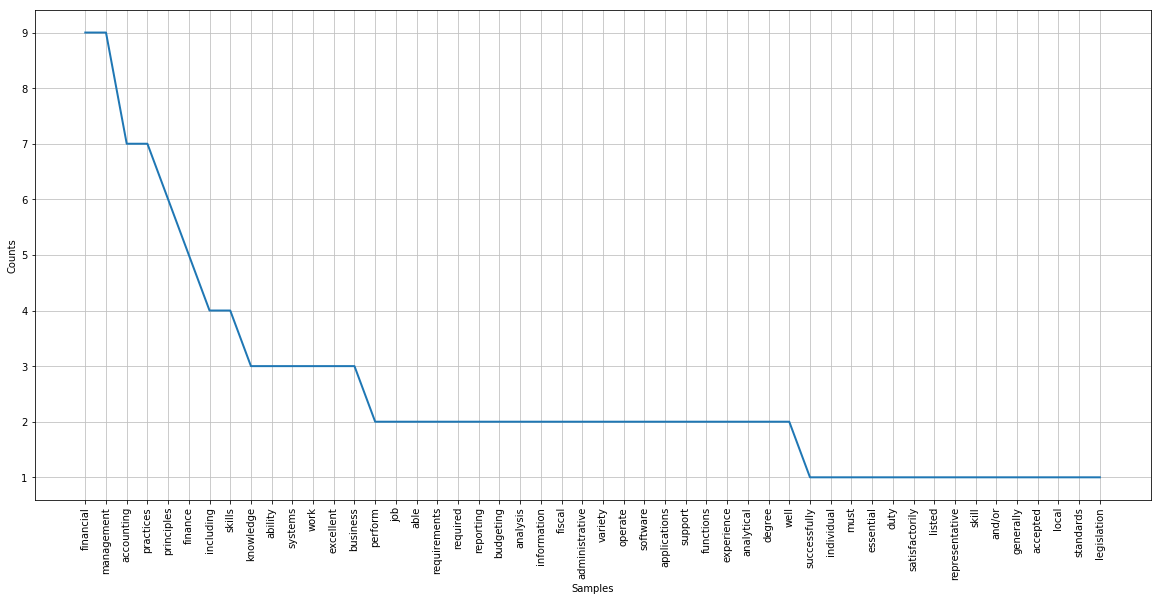

In [36]:
# Remove stopwords, and try again
stop = stopwords.words('english')
tokens_nostop = [t for t in tokens_nop if t not in stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nostop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

Tokens starting to have some meaning. What can we do with this? 
Job title is : 

In [37]:
print((df.iloc[0])['Title'])

Chief Financial Officer


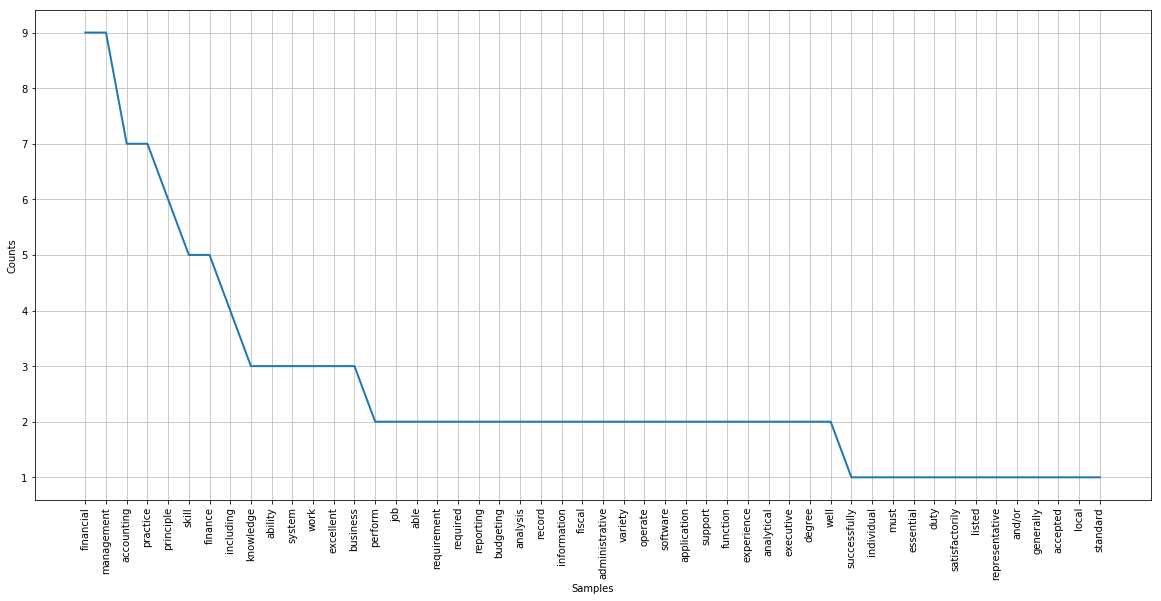

In [38]:
wnl = nltk.WordNetLemmatizer()
tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_lem)  # case sensitive!
fd.most_common(50)
fd.plot(50)

In [39]:
tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(tokens_clean)


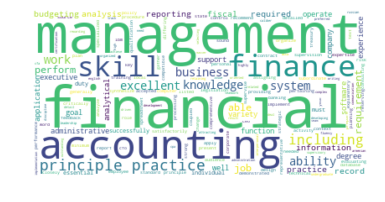

In [40]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create a Preprocessing Function for All Rows

In [41]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [42]:
tokens_clean = preprocess((df.iloc[4])['RequiredQual_token']) # we know this is a software job
print(tokens_clean)

['university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', '2000', 'server', 'networking', 'tcp/', 'technology', 'sql', '2000', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'company']


university degree economical background plus excellent knowledge window 2000 server networking tcp/ technology sql 2000 server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted company


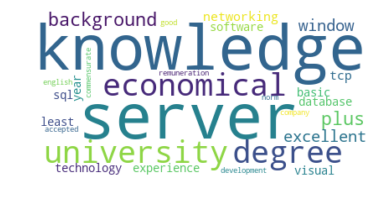

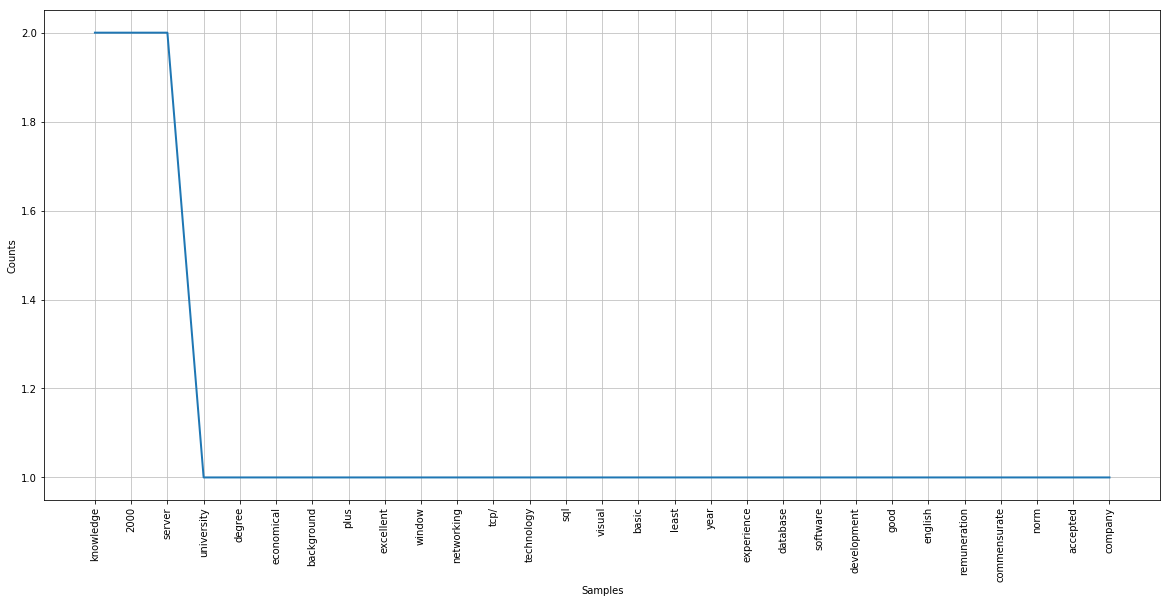

In [43]:
plotWC(tokens_clean)

In [44]:
df['RequiredQual_processed'] = df.RequiredQual_token.apply(preprocess)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df['RequiredQual_processed'].head()

0    [perform, job, successfully, individual, must,...
1    [bachelor, degree, master, preferred, excellen...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: RequiredQual_processed, dtype: object

## Get Feature Matrix

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
df['RequiredQual_processedtext'] = df.RequiredQual_processed.apply(lambda x: ' '.join(x))

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
vec_tf = CountVectorizer(min_df=2)
required_qual_tf = vec_tf.fit_transform(df['RequiredQual_processedtext'])
print(required_qual_tf.shape)


(16689, 6848)


In [49]:
print(required_qual_tf.toarray())
required_qual_feature_names = (vec_tf.get_feature_names())
required_qual_feature_names[:10]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['00', '000', '04', '10', '100', '1000', '10g', '11', '11g', '12']

In [50]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
required_qual_tfidf = vec_tfidf.fit_transform(df['RequiredQual_processedtext'])
print(required_qual_tfidf.shape)

(16689, 5591)


In [52]:
 # To save the vectorized results for future use
import pickle

pickle.dump(required_qual_tfidf, open("models/required_qual_tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("models/required_qual_tfidf_features.pkl", "wb"))


In [143]:
# load the content
# loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = pickle.load(open("./tfidf.pkl", "rb"))
# print(tfidf)

## Clustering Try 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(1500)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(required_qual_tfidf)

In [56]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 89%


In [57]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 7

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

Wall time: 4.66 s
Clusters: 7
Silhouette Coefficient for clusters: 0.013


In [58]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)


Cluster 0: net sql web development good server javascript database html php
Cluster 1: ability management work degree year good excellent project field armenian
Cluster 2: higher education work russian excellent armenian good computer field ability
Cluster 3: accounting finance armenian tax work financial legislation good excellent standard
Cluster 4: marketing sale business excellent ability work russian communication strong degree
Cluster 5: development testing software design good programming ability plus tool linux
Cluster 6: work excellent ability armenian russian good university communication degree strong


Any pattern here between the clusters? 

In [59]:
df["RequiredQual"].head()

0    To perform this job successfully, an\r\nindivi...
1    - Bachelor's Degree; Master's is preferred;\r\...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object